In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/datasets/onemonthprocessed.csv')
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)
df = df.drop_duplicates(subset=['ds'], keep='first')
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                   ds     y
0 2024-05-13 00:00:00  6.61
1 2024-05-13 00:00:05  6.66
2 2024-05-13 00:00:10  6.66
3 2024-05-13 00:00:15  6.41
4 2024-05-13 00:00:20  6.41
                        ds     y
550069 2024-06-13 23:59:40  2.81
550070 2024-06-13 23:59:45  2.91
550071 2024-06-13 23:59:50  2.91
550072 2024-06-13 23:59:55  2.84
550073 2024-06-14 00:00:00  2.84
                                  ds              y
count                         550043  550043.000000
mean   2024-05-28 23:11:52.324518656       4.362169
min              2024-05-13 00:00:00       0.450000
25%       2024-05-20 23:22:37.500000       2.240000
50%              2024-05-28 22:34:20       4.560000
75%       2024-06-05 22:41:02.500000       5.940000
max              2024-06-14 00:00:00      11.520000
std                              NaN       2.275354
ds    datetime64[ns]
y            float64
dtype: object
550043


In [3]:
df['y'].isnull().values.any()

False

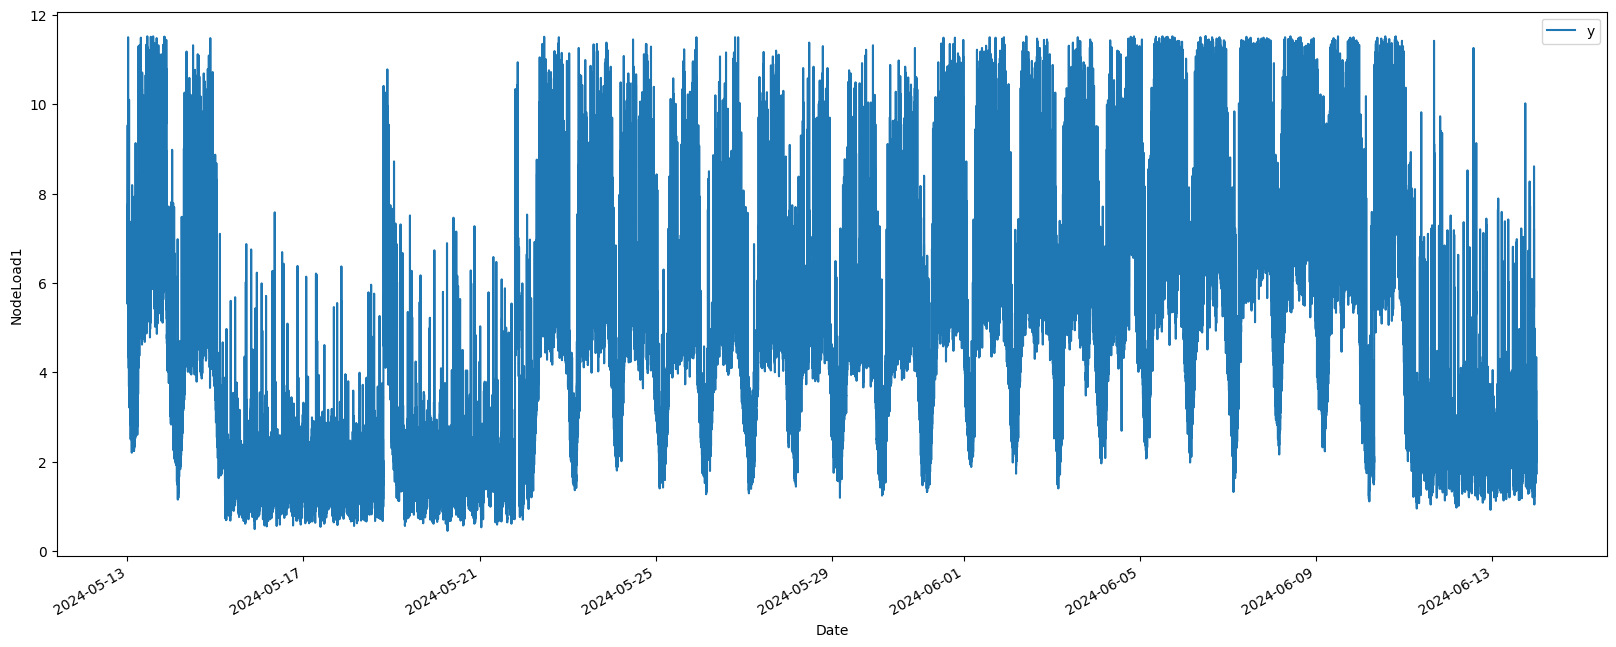

In [4]:
ax = df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('NodeLoad1')
ax.set_xlabel('Date')

plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore', 'Trying to infer the `batch_size`', UserWarning)

m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='5s', valid_p = 0.2)
metrics = m.fit(df_train, freq='5s', validation_df=df_val)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5s corresponds to 99.898% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col

Training: |                                                                                                   …

Finding best initial lr:   0%|          | 0/291 [00:00<?, ?it/s]

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

In [6]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,2.775953,2.954457,0.259987,0.0,0,0.108804,0.0,1.863075,2.391327,0.108763,0.0
1,3.073440,3.224741,0.297846,0.0,1,0.036918,0.0,1.047684,1.380367,0.036917,0.0
2,3.133145,3.277625,0.304603,0.0,2,0.031090,0.0,0.914736,1.236152,0.031090,0.0
3,2.961818,3.113564,0.282920,0.0,3,0.029880,0.0,0.883996,1.203275,0.029883,0.0
4,3.005101,3.159216,0.288076,0.0,4,0.029692,0.0,0.881004,1.197644,0.029692,0.0
5,2.926579,3.088461,0.279124,0.0,5,0.029845,0.0,0.884051,1.200191,0.029845,0.0
6,2.978279,3.129703,0.284365,0.0,6,0.029760,0.0,0.882549,1.198634,0.029759,0.0
7,3.031371,3.178131,0.291679,0.0,7,0.029624,0.0,0.880331,1.195780,0.029625,0.0
8,3.143181,3.288202,0.306411,0.0,8,0.029325,0.0,0.874902,1.190330,0.029327,0.0
9,3.020252,3.179962,0.291416,0.0,9,0.029110,0.0,0.870832,1.186143,0.029112,0.0


In [7]:
import warnings
warnings.filterwarnings('ignore', 'Trying to infer the `batch_size`', UserWarning)

future = m.make_future_dataframe(df, periods=17280*10, n_historic_predictions=len(df))
forecast = m.predict(future)
forecast

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5s corresponds to 99.898% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col

Predicting: |                                                                                                 …

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2024-05-13 00:00:00,6.61,6.256499,6.769352,-0.073177,-0.439676
1,2024-05-13 00:00:05,6.66,6.256410,6.769264,-0.073177,-0.439676
2,2024-05-13 00:00:10,6.66,6.256321,6.769175,-0.073177,-0.439676
3,2024-05-13 00:00:15,6.41,6.256233,6.769086,-0.073177,-0.439676
4,2024-05-13 00:00:20,6.41,6.256145,6.768998,-0.073177,-0.439676
...,...,...,...,...,...,...
722838,2024-06-23 23:59:40,NaN,9.055957,9.579003,-0.073239,-0.449807
722839,2024-06-23 23:59:45,NaN,9.055968,9.579015,-0.073239,-0.449807
722840,2024-06-23 23:59:50,NaN,9.055979,9.579025,-0.073239,-0.449807
722841,2024-06-23 23:59:55,NaN,9.055990,9.579037,-0.073239,-0.449807


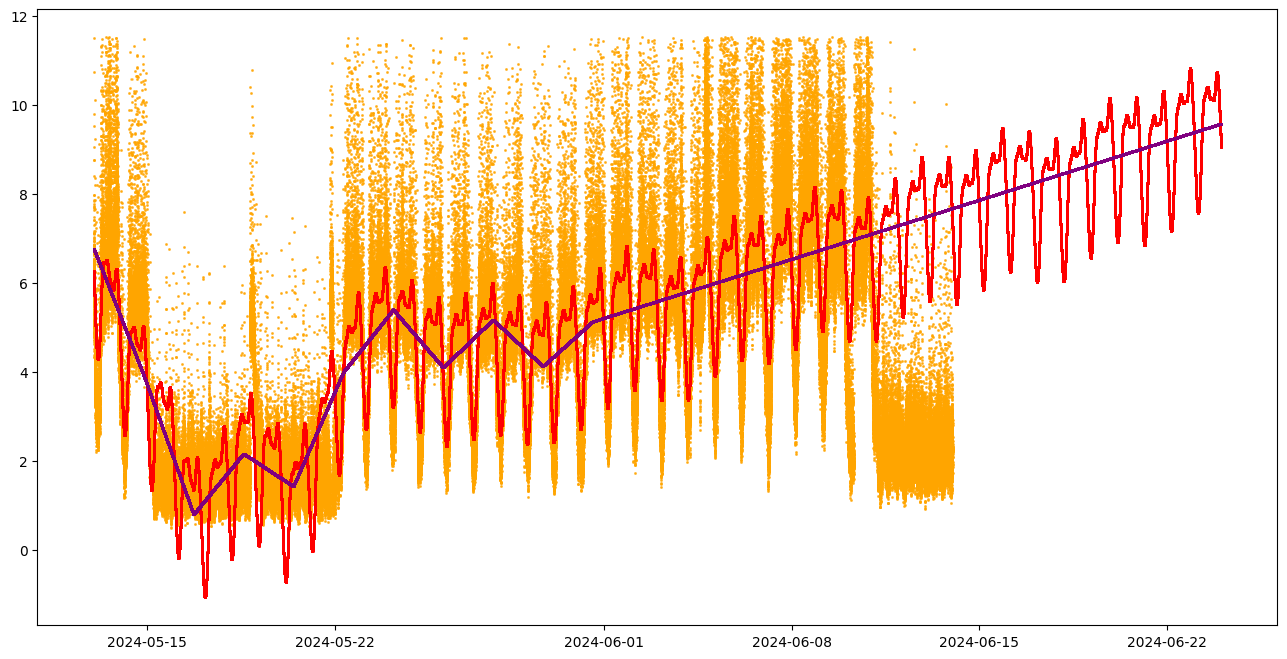

In [8]:
plt.figure(figsize = (16,8))
plt.scatter(df['ds'], df['y'], color='orange', alpha=0.5, s =1)
plt.scatter(forecast['ds'], forecast['yhat1'], color='red', alpha=0.5, s =1)
plt.scatter(forecast['ds'], forecast['trend'], color='purple', alpha=0.5, s =1)

In [10]:
forecast.to_csv('../data/predicted/neural_month_predicted_nodeload1.csv', index=False)